Se detecto el circulo de centro:  183.5 , 182.5  y radio:  132.8


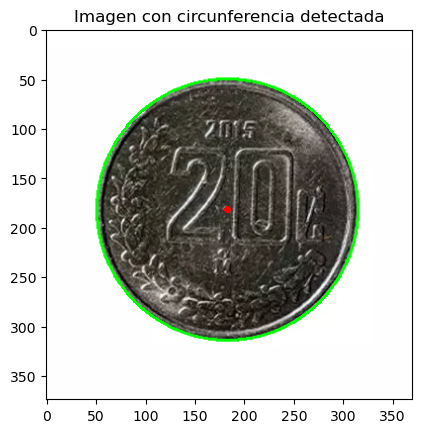

Se detecto el circulo de centro:  138.5 , 139.5  y radio:  132.8


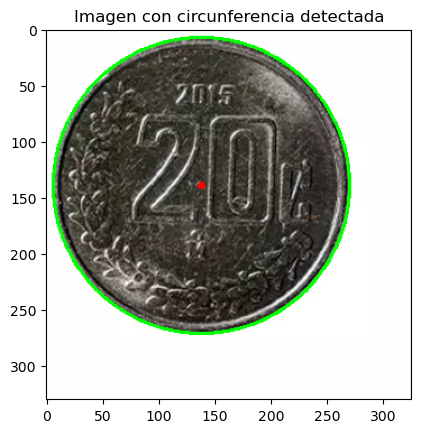

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def identificacion_circulos(archivo):
    # Leer la imagen
    imagen = cv2.imread(archivo)

    # Convertir la imagen a escala de grises
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    # Aplicar un filtro de suavizado gaussiano para eliminar el ruido
    imagen_suavizada = cv2.GaussianBlur(imagen_gris, (5, 5), 0)


    # Armado de mascara para eliminnar ruido interno
    mascara = cv2.inRange(imagen_suavizada, np.array([100]), np.array([200]))


    # Aplicar la máscara a la imagen original
    res = cv2.bitwise_and(imagen, imagen, mask=mascara)


    # Detectar los bordes de la imagen
    bordes = cv2.Canny(res, 50, 150)

    # Aplicar la transformada de Hough para detectar círculos
    círculos = cv2.HoughCircles(bordes, cv2.HOUGH_GRADIENT, dp=1, minDist=300, param1=100, param2=40)

    # Dibujar los círculos detectados en la imagen original
    if círculos is not None:
        for (x, y, r) in círculos[0]:
            cv2.circle(imagen, (int(x), int(y)), int(r), (0, 255, 0), 2)
            cv2.circle(imagen, (int(x), int(y)), 2, (255, 0, 0), 2)
            print("Se detecto el circulo de centro: ", x,",",y, " y radio: ", r)

    # Mostrar la imagen final
    plt.imshow(imagen)
    plt.title('Imagen con circunferencia detectada')
    plt.show()

identificacion_circulos("moneda.png")
identificacion_circulos("moneda1.png")


